# Customer Churn Prediction


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Importing the dataset
Dataset : https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

In [3]:
telco_data = pd.read_csv("telco_customer_churn.csv")

# Exploratory data analysis

In [4]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telco_data.shape

(7043, 21)

In [6]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


This shows that the 75% of the customers have tenure less than 55 months.
And the 25% customers have monthly charges greater than 89.85


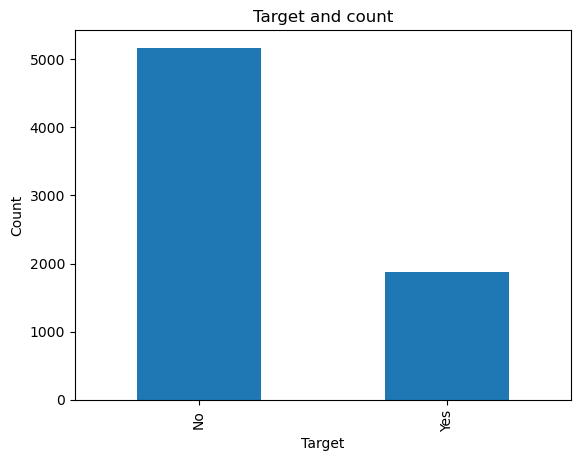

In [9]:
telco_data['Churn'].value_counts().plot(kind = 'bar')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target and count')
plt.show()

In [10]:
telco_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
telco_data['Churn'].value_counts()*100/len(telco_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

As we can see that it is very imbalanced data

In [12]:
# Checking for any null values in the dataset
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
telco_df = telco_data.copy() #Can be used for data manipulation and processing

In [14]:
telco_df.TotalCharges = pd.to_numeric(telco_df.TotalCharges, errors = 'coerce')

In [15]:
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 data from the Total charges column that are null. as it is only 11 which is very less, we can drop the null value

In [16]:
telco_df.dropna(inplace=True)

In [17]:
telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
# Dividing the coustomers into bins based on the tenure
print(telco_df['tenure'].max())

72


In [19]:
#Dividing it into the bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
telco_df['tenure_group'] = pd.cut(telco_df.tenure, range(1, 80, 12), right=False, labels=labels)

In [20]:
telco_df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [21]:
# Removing the columns from the dataset that may not be essential for the our task
telco_df.drop(columns = ['customerID', 'tenure'], axis=1, inplace=True)

In [22]:
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


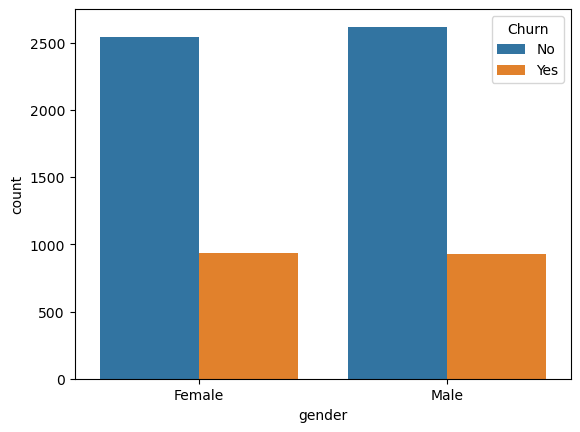

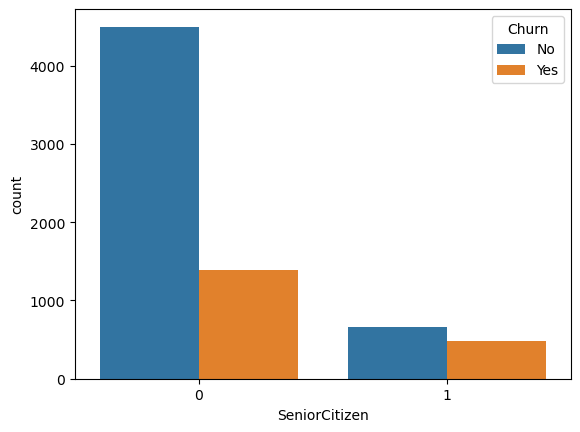

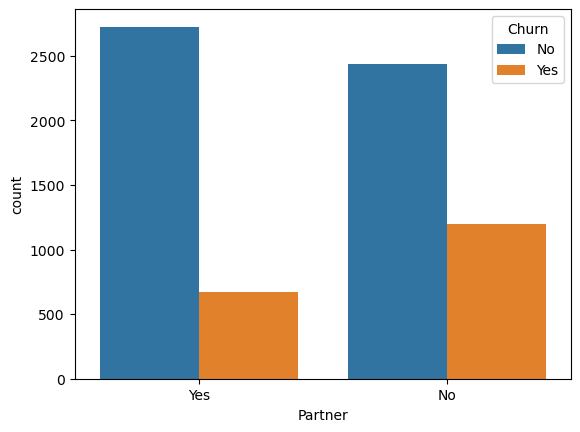

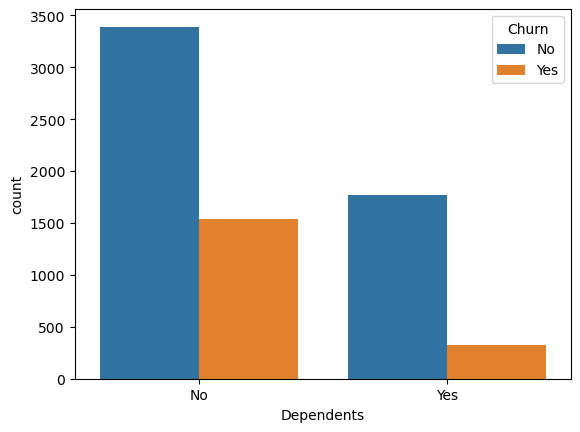

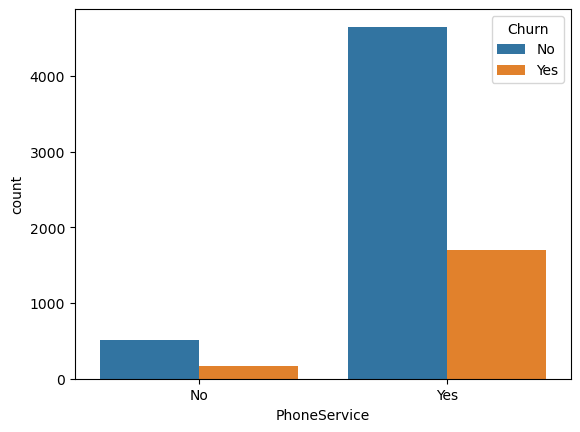

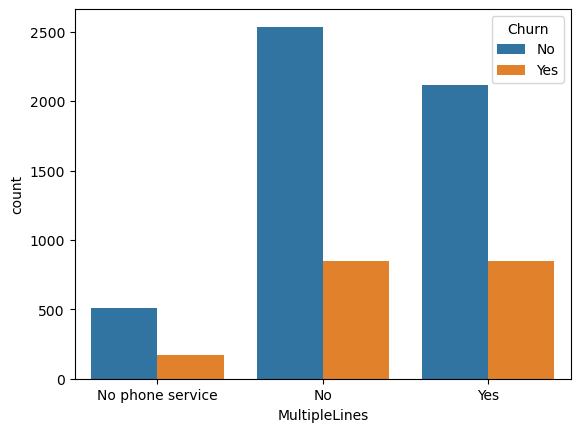

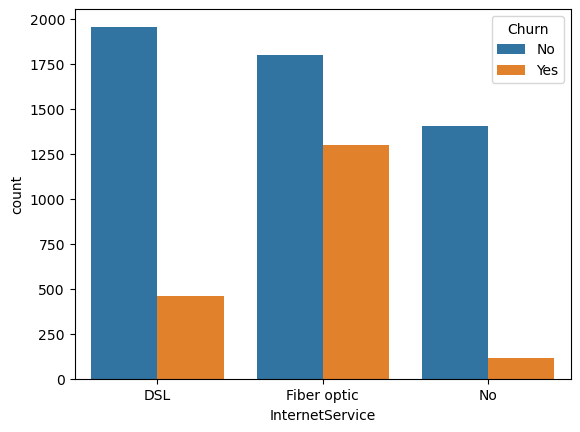

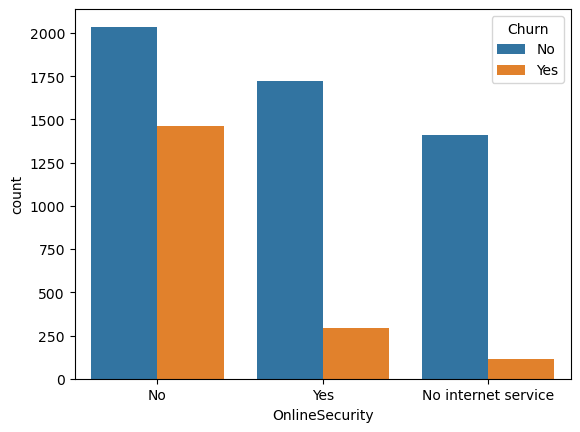

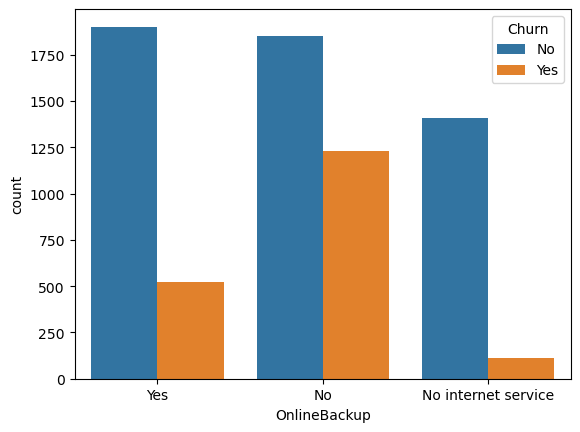

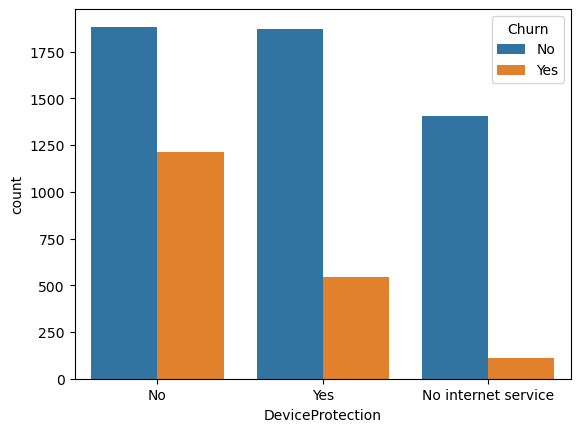

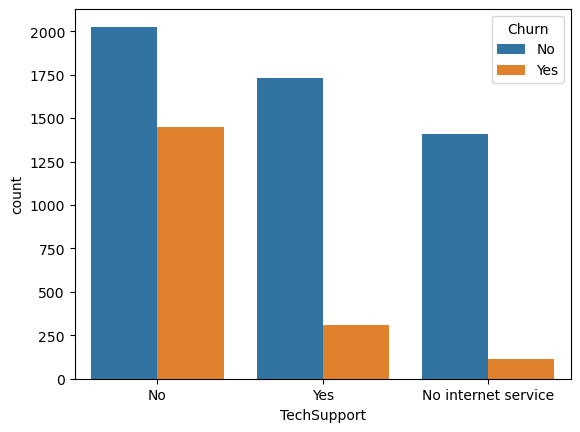

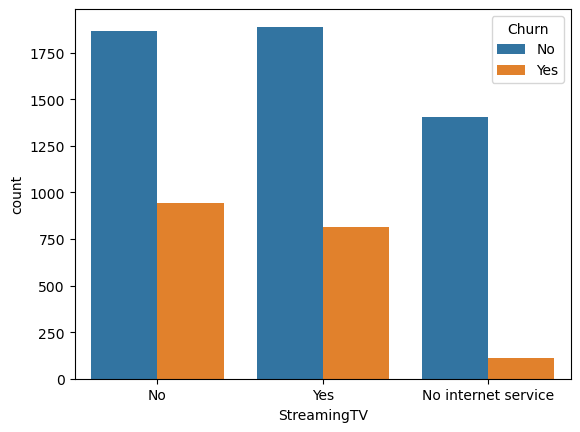

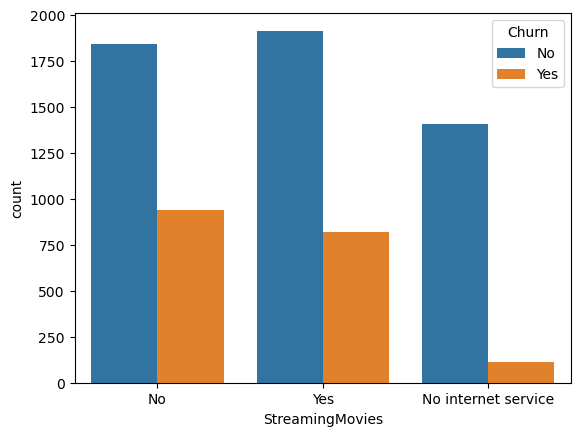

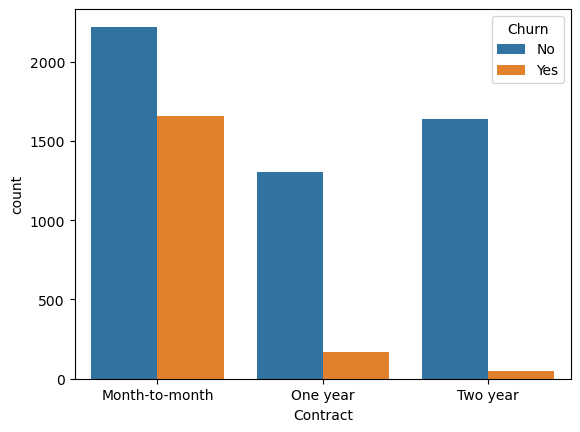

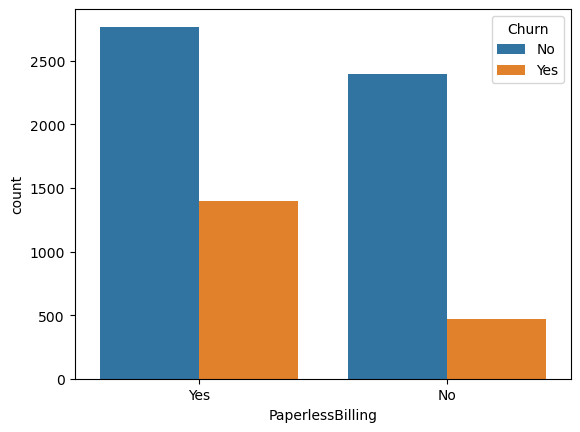

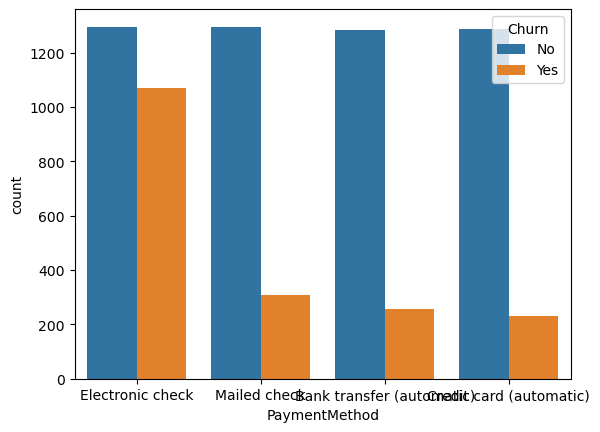

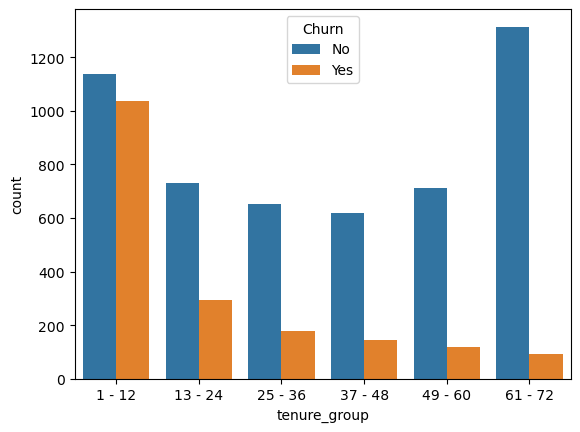

In [23]:
#Univariate analysis
for i, predictor in enumerate(telco_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = telco_df, x = predictor, hue = 'Churn')

In [24]:
telco_df['Churn'] = np.where(telco_df.Churn == 'Yes',1,0)

In [25]:
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [26]:
#Converting the Categorical Variables into the dummy variables
telco_df1 = pd.get_dummies(telco_df)

In [27]:
telco_df1.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


<AxesSubplot:>

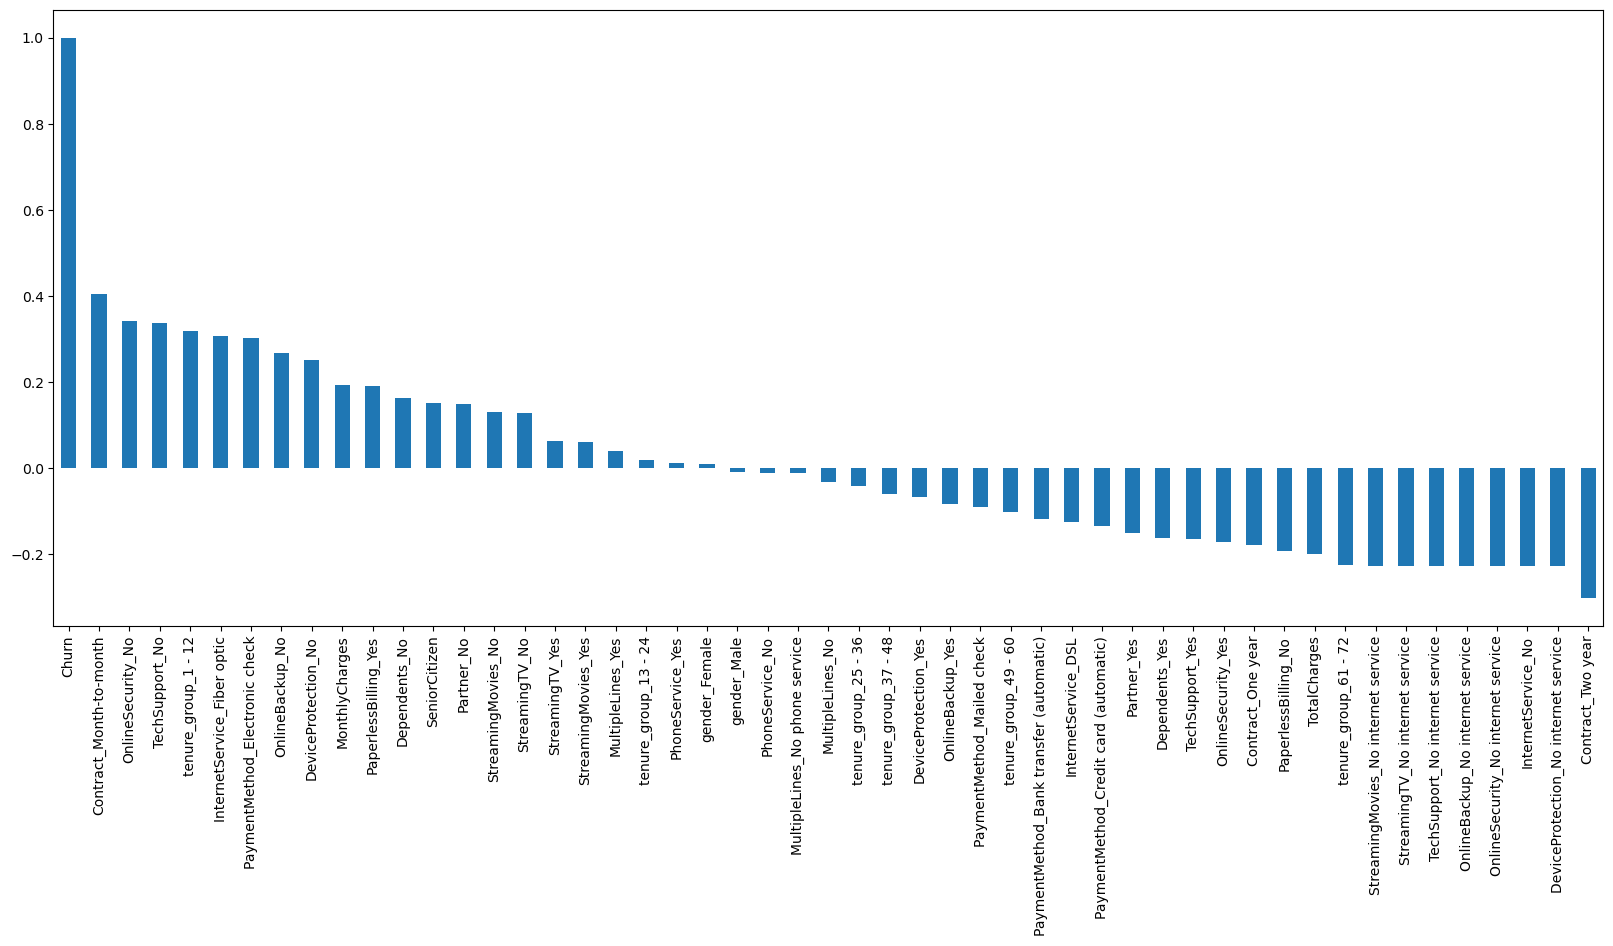

In [28]:
#Correlation with the churn 
plt.figure(figsize=(20,8))
telco_df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

As we can get insight, month-to-month contract, having no online security or techsupport are among the high churner while phone service and gender had no impact

<AxesSubplot:>

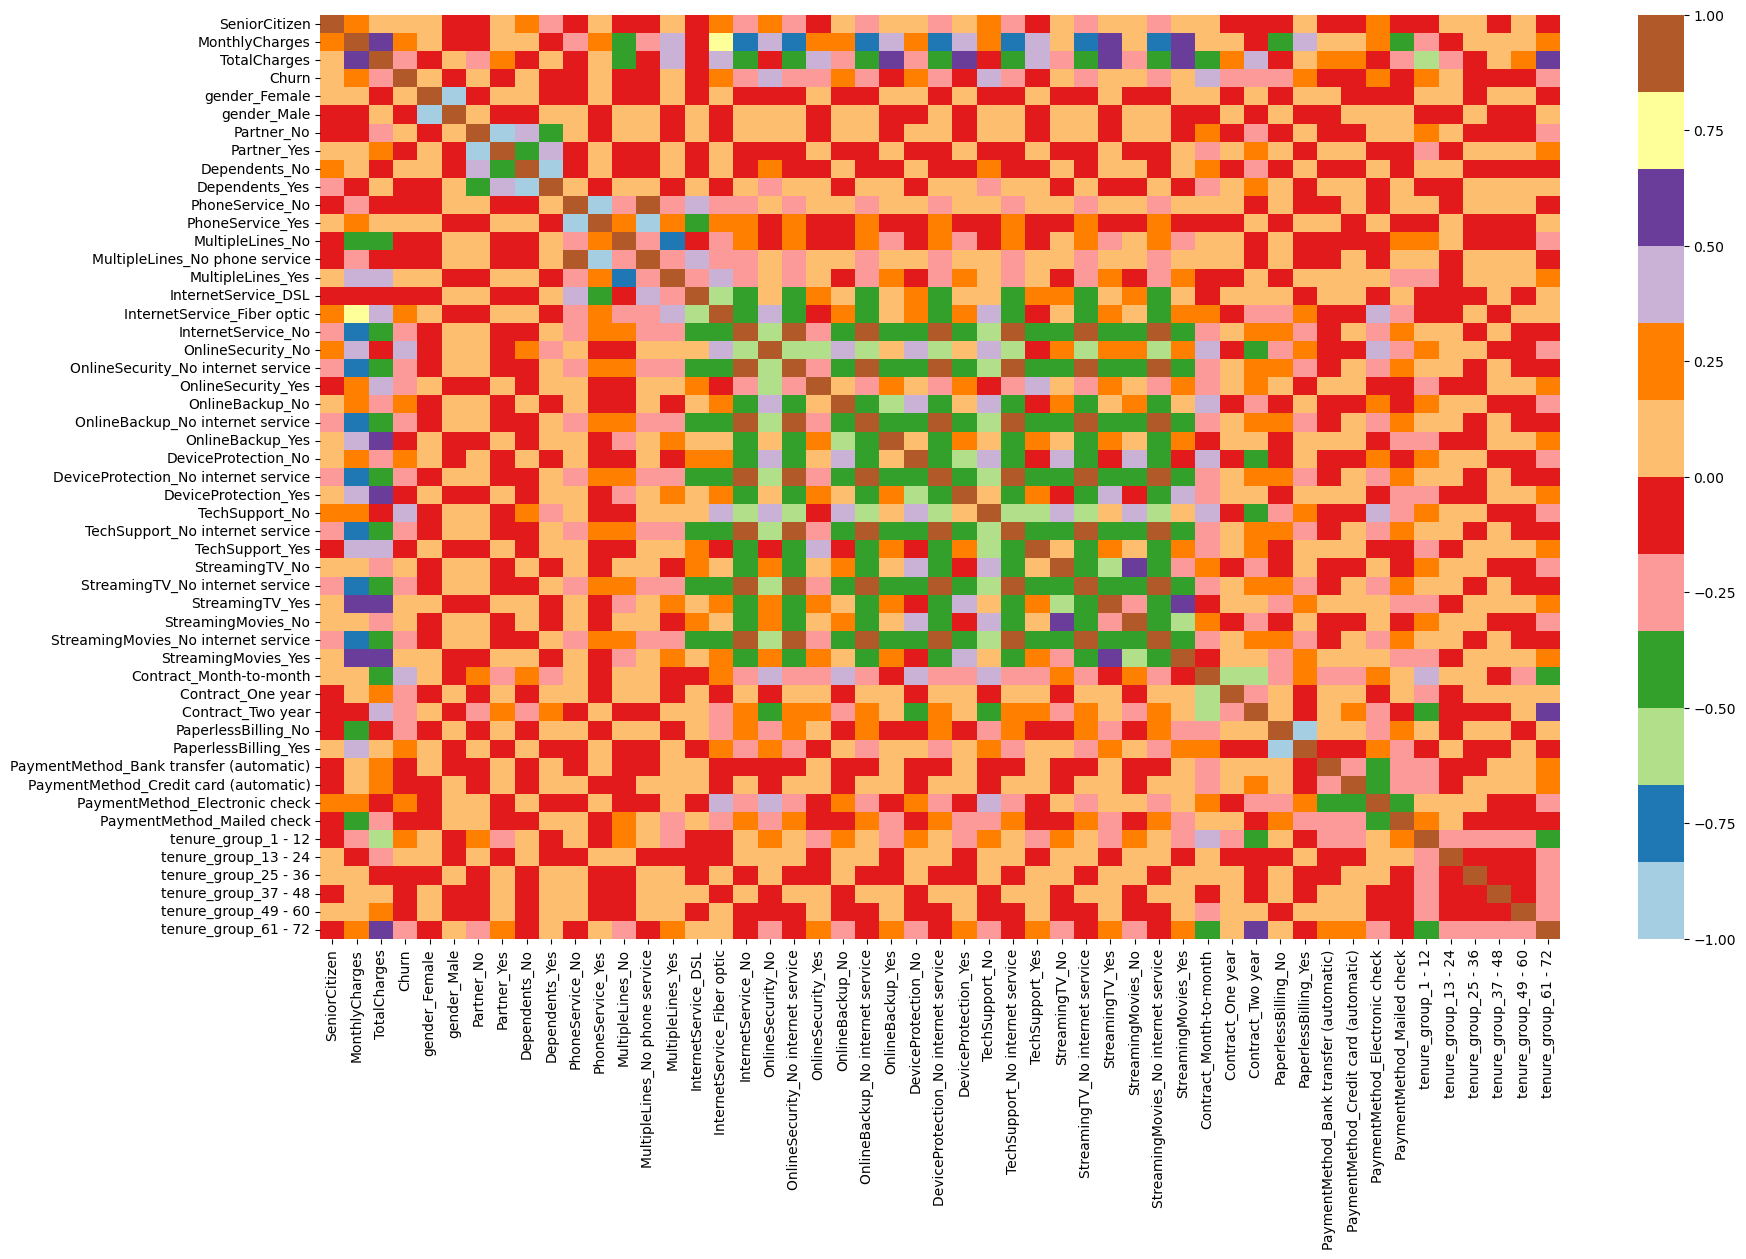

In [82]:
plt.figure(figsize = (20,12))
sns.heatmap(telco_df1.corr(), cmap='Paired')

# Model Building

In [32]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [33]:
telco_df1.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [34]:
telco_df1.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'P

In [36]:
# Creating a X and Y variables 
X = telco_df1.drop('Churn', axis = 1)
X

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [37]:
Y = telco_df1['Churn']
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#### Decision Tree Classifier

In [39]:
model_dt = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [40]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [41]:
y_predict = model_dt.predict(x_test)

In [42]:
y_predict

array([1, 0, 0, ..., 1, 0, 0])

In [43]:
model_dt.score(x_test, y_test)

0.7853589196872779

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, y_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1017
           1       0.67      0.44      0.53       390

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



As we can see that accuracy is not much as it an imbalance dataset

In [48]:
from imblearn.combine import SMOTEENN

In [52]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,Y)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [54]:
model_dt_smote = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [55]:
model_dt_smote.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [56]:
yr_predict = model_dt_smote.predict(X_test)

In [58]:
print(classification_report(Y_test, yr_predict))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       541
           1       0.90      0.95      0.93       614

    accuracy                           0.92      1155
   macro avg       0.92      0.92      0.92      1155
weighted avg       0.92      0.92      0.92      1155



In [59]:
model_dt_smote.score(X_test, Y_test)

0.9186147186147187

In [60]:
print(metrics.confusion_matrix(Y_test, yr_predict))

[[476  65]
 [ 29 585]]


*This model give a quite good accuracy i.e., 92%. Lets try other classifier

**Random Forest Classifier**

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model_rt = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [66]:
model_rt.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [67]:
yrt_pred = model_rt.predict(x_test)

In [68]:
print(classification_report(y_test, yrt_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1017
           1       0.70      0.44      0.54       390

    accuracy                           0.79      1407
   macro avg       0.76      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [69]:
sm = SMOTEENN()
Xr_resampled, yr_resampled = sm.fit_resample(X,Y)

In [70]:
Xr_train, Xr_test, Yr_train, Yr_test = train_test_split(Xr_resampled, yr_resampled, test_size=0.2)

In [71]:
model_rt_smoten = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [76]:
model_rt_smoten.fit(Xr_train, Yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [77]:
yrt_predict = model_rt_smoten.predict(Xr_test)

In [78]:
print(classification_report(Yr_test, yrt_predict))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       540
           1       0.93      0.97      0.95       639

    accuracy                           0.94      1179
   macro avg       0.94      0.94      0.94      1179
weighted avg       0.94      0.94      0.94      1179



In [79]:
model_rt_smoten.score(Xr_test, Yr_test)

0.9414758269720102